### Zomato Data Analysis
Using Numpy, Matplotlib, Pandas, and Seaborn to explore and visualize a sample set of public data provided by Zomato.

### What is Zomato?
- Zomato is an Indian restaurant aggregator and food delivery company. It was founded in 2008 and is regarded as one of India's most successful startups. Users of the app can place food delivery orders, make reservations at restaurants, and find local food recommendations based on their location. It is used in 22 countries.

In [1]:
print("hello world")

hello world


In [126]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Packages Imported!")

ModuleNotFoundError: No module named 'currency_converter'

In [40]:
# Load Zomato dataset
zomato_df = pd.read_csv("Zomato_Data.csv")
print(zomato_df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [41]:
# Rename columns and clean up data
zomato_df = zomato_df.rename(columns={"approx_cost(for two people)": "approx_cost", 
                                      "listed_in(type)": "type"})

zomato_df['rate'] = zomato_df['rate'].str.split('/', n=1).str[0].astype(float)


In [45]:
print(zomato_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          148 non-null    object 
 1   online_order  148 non-null    object 
 2   book_table    148 non-null    object 
 3   rate          148 non-null    float64
 4   votes         148 non-null    int64  
 5   approx_cost   148 non-null    int64  
 6   type          148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB
None


Text(0, 0.5, 'Count')

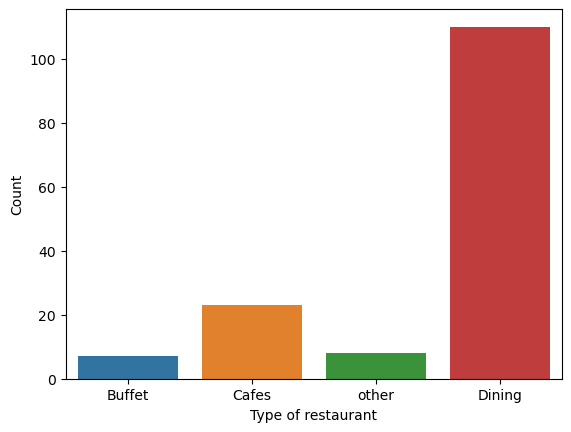

In [48]:
sns.countplot(x=zomato_df['type'])
plt.xlabel("Type of restaurant")
plt.ylabel("Count")

Text(0, 0.5, 'Votes')

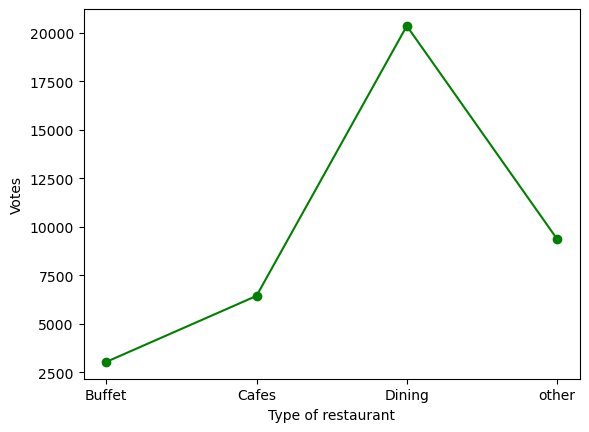

In [120]:
# Show the average votes of restaurant per category
grouped_data = zomato_df.groupby('type')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o", figsize=)
plt.xlabel("Type of restaurant")
plt.ylabel("Votes")

Text(0, 0.5, 'Rating')

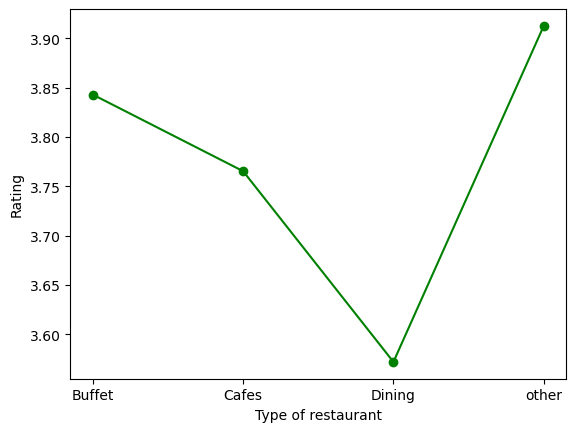

In [123]:
# Show the average restaurant rating per category
grouped_data = zomato_df.groupby('type')['rate'].mean()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant")
plt.ylabel("Rating")

Text(0, 0.5, 'Cost (R)')

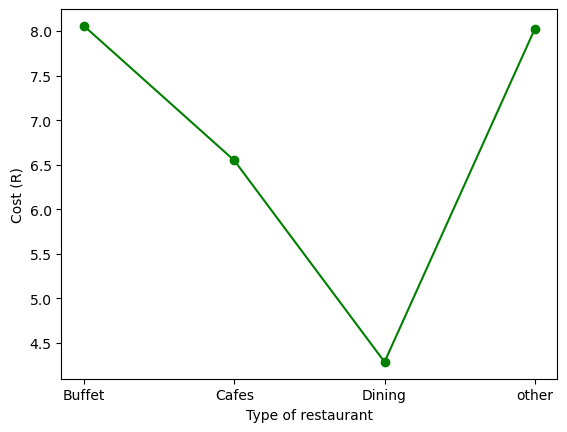

In [127]:
# Show the average restaurant cost (per 2 people) per category. Convert to USD
grouped_data = zomato_df.groupby('type')['approx_cost'].mean() * 0.012
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant")
plt.ylabel("Cost (R)")

In [71]:
# Calculate the restaurants with the max votes per category
max_votes = zomato_df.groupby('type')['votes'].transform("max") == zomato_df['votes']

print("Restaurants in each category with the maximum votes")
zomato_df[max_votes].sort_values(by=['votes'], ascending=False)

Restaurants in each category with the maximum votes


,name,online_order,book_table,rate,votes,approx_cost,type
38,Empire Restaurant,Yes,No,4.4,4884,750,other
86,Meghana Foods,Yes,No,4.4,4401,600,Dining
7,Onesta,Yes,Yes,4.6,2556,600,Cafes
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet


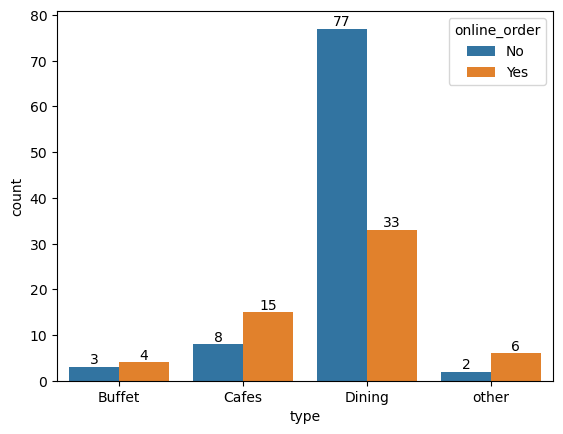

In [117]:
# Show the split of restaurants that offer/do not offer online ordering per category
online_order_graph = sns.countplot(data=zomato_df, 
                                   x='type', 
                                   order=['Buffet', 'Cafes', 'Dining', 'other'],
                                   hue='online_order', 
                                   hue_order=['No', 'Yes'])

for container in online_order_graph.containers:
    online_order_graph.bar_label(container)

In [116]:
# The above analysis, in a numeric format
online_pcts = (zomato_df.groupby(['type', 'online_order'])['name'].count() / 
               zomato_df.groupby(['type'])['name'].count()).round(2) * 100
online_pcts

type    online_order
Buffet  No              43.0
        Yes             57.0
Cafes   No              35.0
        Yes             65.0
Dining  No              70.0
        Yes             30.0
other   No              25.0
        Yes             75.0
Name: name, dtype: float64